### Mount Google Drive

This cell mounts your Google Drive to the Colab environment, allowing you to access files stored in your Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install Kaggle Library

This cell installs the Kaggle Python library using pip, which is necessary to download datasets from Kaggle.

In [ ]:
# 1. Install the Kaggle library
!pip install kaggle

### Upload kaggle.json

This cell prompts you to upload your `kaggle.json` file, which contains your Kaggle API credentials. This file is needed to authenticate and download datasets from Kaggle.

In [ ]:
# 2. Upload your kaggle.json file
from google.colab import files
print("Please upload the kaggle.json file you downloaded from Kaggle:")
files.upload()

Please upload the kaggle.json file you downloaded from Kaggle:


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohdabdulrafay2001","key":"61b2d286920de28a569554f9ca823b7b"}'}

### Set up Kaggle API Key

This cell sets up the Kaggle API key by creating a `.kaggle` directory, copying the uploaded `kaggle.json` file into it, and setting the appropriate file permissions. This allows the Kaggle library to access your credentials securely.

In [ ]:
# 3. Set up the Kaggle API key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API key configured.")

Kaggle API key configured.


### Download and Copy Dataset to Google Drive

This cell downloads the specified dataset from Kaggle using `kagglehub` and then copies the downloaded files to a specified directory in your Google Drive. This ensures that the dataset is persistently stored even after the Colab runtime ends.

In [ ]:
import kagglehub
import os
print("Downloading dataset with kagglehub...")
# 2. Download the dataset to a local Colab path
# This path is temporary and will be deleted when the runtime ends
download_path = kagglehub.dataset_download("banuprasadb/visdrone-dataset")

print(f"Dataset downloaded to (temporary path): {download_path}")

# 3. Define your permanent Google Drive target path
# (Quotes are needed because of the spaces)
target_dir = "/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets"

# 4. Create the target folder if it doesn't exist
print(f"Ensuring target folder exists: {target_dir}")
os.makedirs(target_dir, exist_ok=True)

# 5. Copy the dataset files to your Google Drive
# This will be slow, but you only do it once!
print("Copying files to Google Drive. This may take a while...")
# We use 'cp -r {download_path}/* ...' to copy the *contents* # of the downloaded folder into your target folder.
!cp -r {download_path}/* "{target_dir}"

print("✅ Done! Your dataset is now permanently in:")
print(target_dir)

Using Colab cache for faster access to the 'visdrone-dataset' dataset.
Dataset downloaded to (temporary path): /kaggle/input/visdrone-dataset
Ensuring target folder exists: /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets
Copying files to Google Drive. This may take a while...
✅ Done! Your dataset is now permanently in:
/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets

Listing all directories in /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets:
/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset
/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train
/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-test-dev
/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-test-challenge
/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val
/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-train/ima

### List Contents of Dataset Directory

This cell lists the contents of the directory in your Google Drive where the dataset was copied. This helps verify that the dataset was successfully copied and shows the directory structure.

In [ ]:
!ls -l "/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets"

total 4
drwx------ 6 root root 4096 Oct 24 18:18 VisDrone_Dataset


### Check System and PyTorch Information

This cell prints out information about the Python version, PyTorch version, CUDA availability, GPU name (if available), and the operating system platform. This is useful for verifying the environment setup and ensuring that PyTorch can utilize the GPU.

In [ ]:
import sys
import torch
import platform

print("Python:", sys.version.split()[0])
print("PyTorch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")
print("Platform:", platform.platform())

Python: 3.12.12
PyTorch: 2.8.0+cu126
CUDA available: True
GPU: NVIDIA A100-SXM4-80GB
Platform: Linux-6.6.105+-x86_64-with-glibc2.35


### Explore Dataset Image Splits

This cell explores the different image splits (train, val, test-dev) of the VisDrone dataset. It counts the number of images in each split and displays a random sample image from each split to provide a visual overview of the data.

train: 6471 images
val: 548 images
test-dev: 1610 images

TRAIN sample: 9999997_00000_d_0000007.jpg


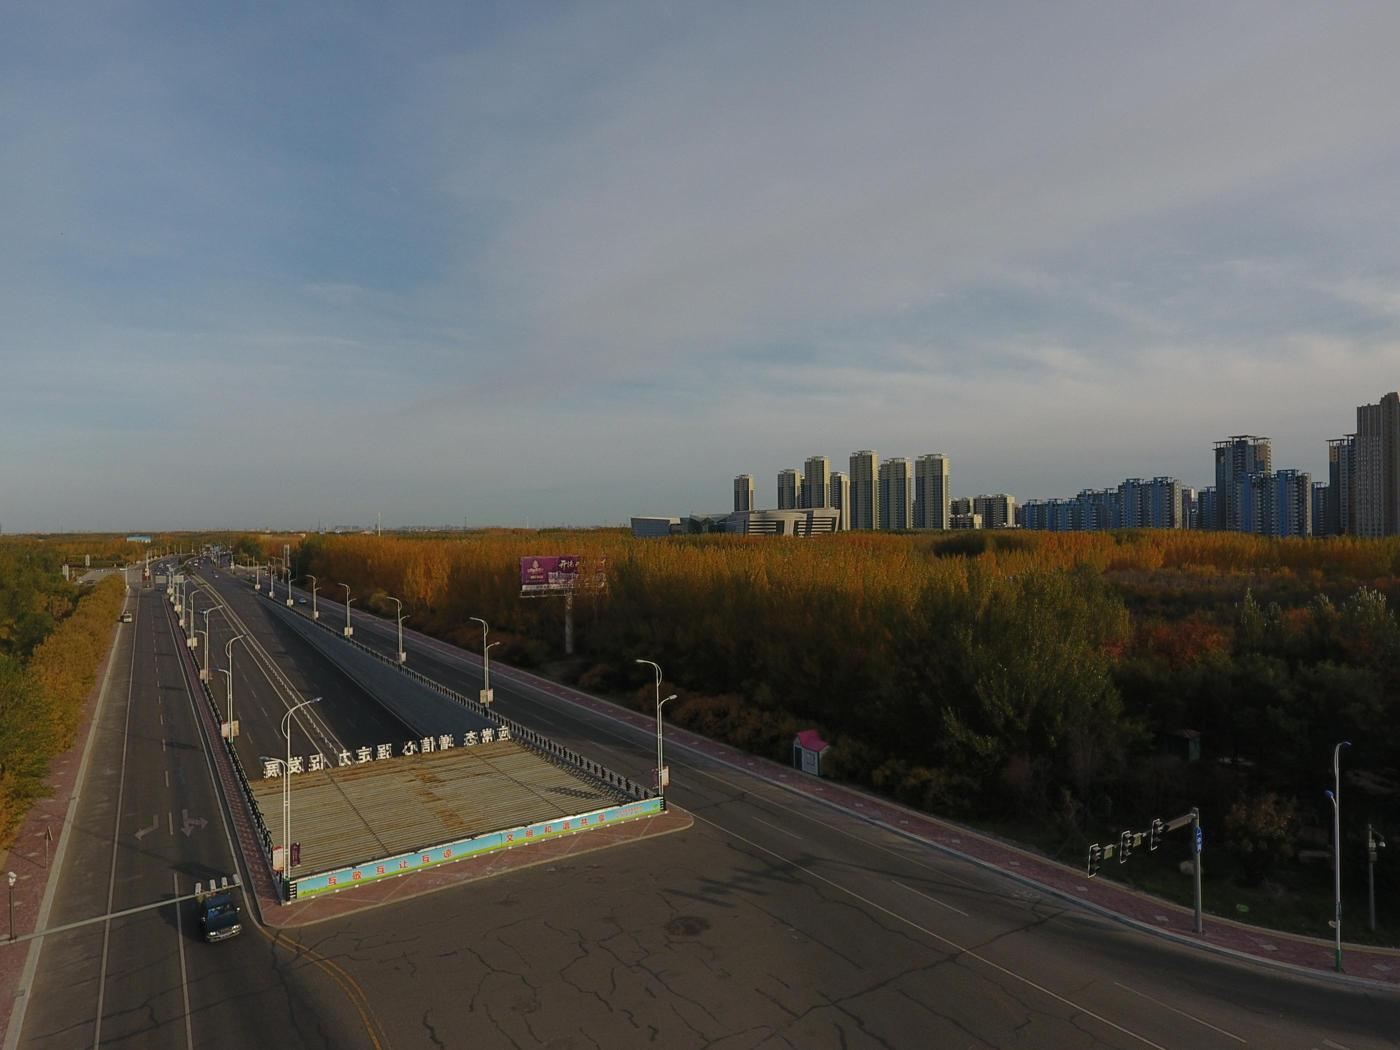


VAL sample: 0000244_02500_d_0000006.jpg


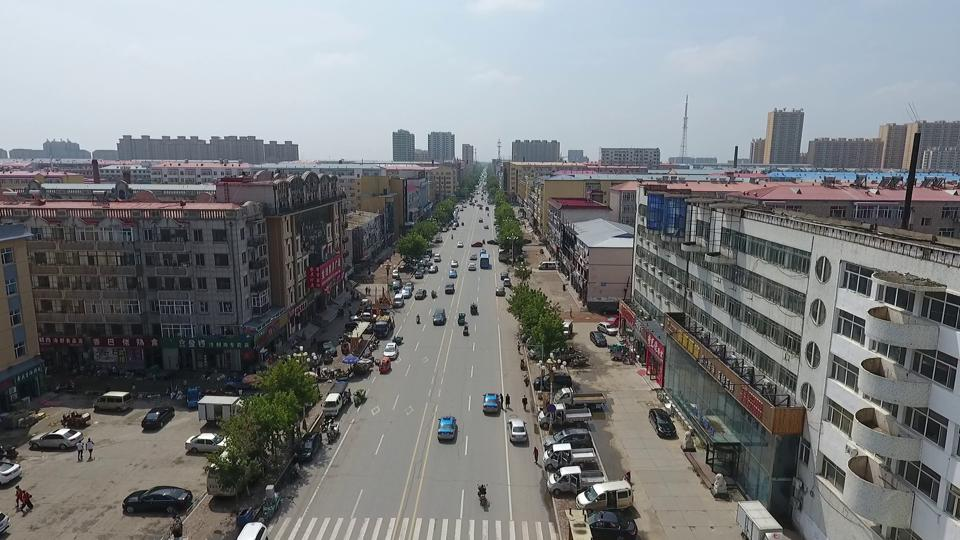


TEST-DEV sample: 9999938_00000_d_0000261.jpg


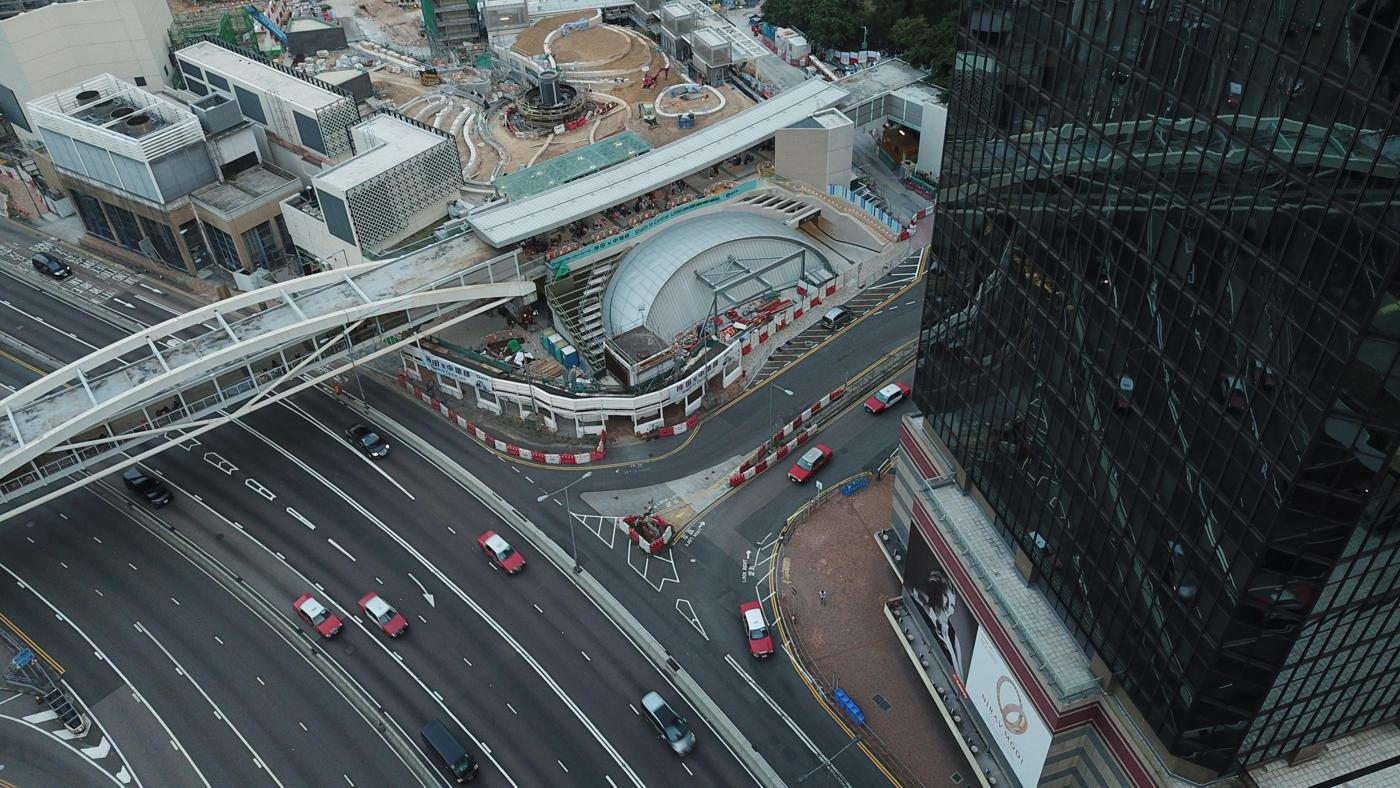

In [ ]:
from pathlib import Path
import random
from IPython.display import Image, display

# Base path to VisDrone DET splits
base = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset")

splits = {
    "train": base / "VisDrone2019-DET-train" / "images",
    "val": base / "VisDrone2019-DET-val" / "images",
    "test-dev": base / "VisDrone2019-DET-test-dev" / "images",
}

exts = {".jpg", ".jpeg", ".png"}
random.seed(0)

# Count images
for name, folder in splits.items():
    if not folder.exists():
        print(f"{name}: folder missing -> {folder}")
        continue
    imgs = [p for p in folder.iterdir() if p.suffix.lower() in exts]
    print(f"{name}: {len(imgs)} images")

# Show one random sample per split
for name, folder in splits.items():
    if not folder.exists():
        continue
    imgs = [p for p in folder.iterdir() if p.suffix.lower() in exts]
    if not imgs:
        print(f"{name.upper()} has no images to preview.")
        continue
    sample = random.choice(imgs)
    print(f"\n{name.upper()} sample: {sample.name}")
    display(Image(filename=str(sample)))

### Visualize Ground Truth Bounding Boxes

This cell defines and uses a function to visualize the ground truth bounding boxes from the YOLO format label files on randomly selected images from the training and validation sets. It draws green rectangles around the objects based on the provided labels.

9999966_00000_d_0000018.jpg: drew 44 boxes from 9999966_00000_d_0000018.txt


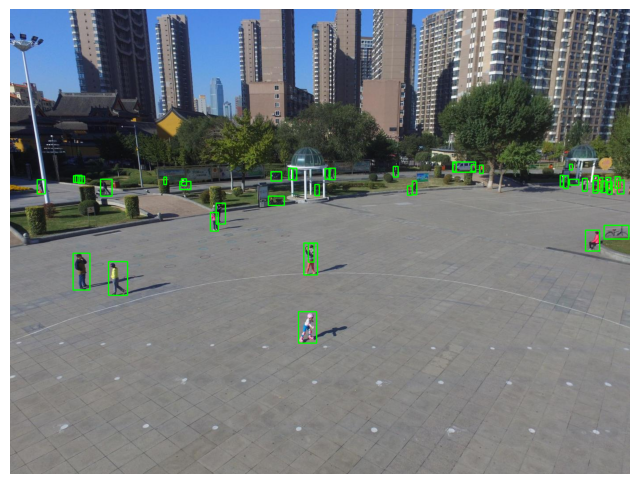

0000194_01192_d_0000125.jpg: drew 23 boxes from 0000194_01192_d_0000125.txt


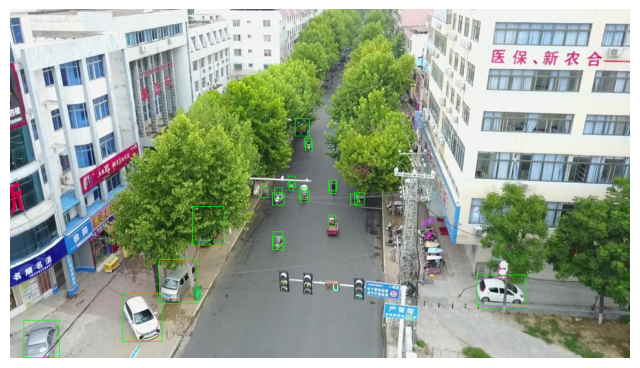

In [ ]:
from pathlib import Path
import random
from IPython.display import Image, display
import cv2
import numpy as np
import matplotlib.pyplot as plt


EXTS = {".jpg", ".jpeg", ".png"}

def show_yolo_label(image_path: Path, class_names=None):
    image_path = Path(image_path)
    img = cv2.imread(str(image_path))
    if img is None:
        print(f"Could not read image: {image_path}")
        return
    h, w = img.shape[:2]

    # Derive label path
    label_path = Path(str(image_path).replace("/images/", "/labels/")).with_suffix(".txt")
    if not label_path.exists():
        print("No label file for:", image_path.name)
        return

    # Simple color palette by class id
    def color_for(cls_id):
        # Use a fixed green color (BGR format)
        return (0, 255, 0)  # Green color in BGR

    drawn = 0
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                # skip malformed rows
                continue
            try:
                cls, x, y, bw, bh = map(float, parts)
            except ValueError:
                continue
            # YOLO -> pixel box
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)
            # Clamp to image bounds
            x1, y1 = max(0, x1), max(0, y1)
            x2, y2 = min(w - 1, x2), min(h - 1, y2)
            if x2 <= x1 or y2 <= y1:
                continue

            thickness = max(1, round(min(w, h) * 0.002))
            color = color_for(cls)
            cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)
            if class_names:
                name = class_names[int(cls)] if int(cls) < len(class_names) else f"{int(cls)}"
                cv2.putText(img, name, (x1, max(0, y1 - 3)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, max(1, thickness-1), cv2.LINE_AA)
            drawn += 1

    print(f"{image_path.name}: drew {drawn} boxes from {label_path.name}")
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Example: display one random train and one random val image
def pick_random_image(folder: Path):
    imgs = [p for p in folder.iterdir() if p.suffix.lower() in EXTS]
    return random.choice(imgs) if imgs else None

train_img = pick_random_image(splits["train"])
val_img   = pick_random_image(splits["val"])

if train_img:
    show_yolo_label(train_img)
else:
    print("No train images found.")

if val_img:
    show_yolo_label(val_img)
else:
    print("No val images found.")

### Dataset Sanity Checks and YAML Creation

This cell performs sanity checks on the dataset directory structure and counts the number of images and label files in the training and validation splits. It also counts the total number of bounding boxes and the count for each object class. Finally, it generates a `visdrone.yaml` file in the Ultralytics YOLO format, which is required for training.

In [ ]:
from pathlib import Path
from collections import Counter

# Base and splits
BASE = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset")

IMG_TRAIN = BASE / "VisDrone2019-DET-train" / "images"
LBL_TRAIN = BASE / "VisDrone2019-DET-train" / "labels"

IMG_VAL   = BASE / "VisDrone2019-DET-val"   / "images"
LBL_VAL   = BASE / "VisDrone2019-DET-val"   / "labels"

IMG_TEST_DEV = BASE / "VisDrone2019-DET-test-dev" / "images"  # optional, no labels

# Sanity checks
for p in [IMG_TRAIN, LBL_TRAIN, IMG_VAL, LBL_VAL]:
    if not p.exists():
        raise FileNotFoundError(f"Missing path: {p}")

# Quick counts
img_ext = {".jpg", ".jpeg", ".png", ".bmp"}
n_train_img = sum(1 for p in IMG_TRAIN.iterdir() if p.suffix.lower() in img_ext)
n_train_lbl = sum(1 for p in LBL_TRAIN.iterdir() if p.suffix.lower() == ".txt")
n_val_img   = sum(1 for p in IMG_VAL.iterdir()   if p.suffix.lower() in img_ext)
n_val_lbl   = sum(1 for p in LBL_VAL.iterdir()   if p.suffix.lower() == ".txt")

print(f"train: {n_train_img} images, {n_train_lbl} labels")
print(f"val  : {n_val_img} images, {n_val_lbl} labels")
print(f"test-dev images path exists: {IMG_TEST_DEV.exists()}")

# Class names (VisDrone 10)
names = [
    "pedestrian","people","bicycle","car","van",
    "truck","bus","motor","tricycle","awning-tricycle"
]
num_classes = len(names)

def count_boxes(labels_dir: Path, num_classes: int):
    """Return total boxes and per-class counts from YOLO .txt labels."""
    total = 0
    per_class = Counter()
    unknown = 0
    for f in labels_dir.glob("*.txt"):
        try:
            with f.open("r") as fh:
                for line in fh:
                    parts = line.strip().split()
                    if len(parts) != 5:
                        continue
                    cls = int(float(parts[0]))
                    total += 1
                    if 0 <= cls < num_classes:
                        per_class[cls] += 1
                    else:
                        unknown += 1
        except Exception:
            continue
    return total, per_class, unknown

# Count boxes
train_total, train_pc, train_unk = count_boxes(LBL_TRAIN, num_classes)
val_total,   val_pc,   val_unk   = count_boxes(LBL_VAL,   num_classes)

print(f"\nTOTAL BOXES — train: {train_total} | val: {val_total} | all: {train_total + val_total}")
if train_unk or val_unk:
    print(f"Warning: unknown-class labels -> train: {train_unk}, val: {val_unk}")

# Pretty per-class table
def print_class_table(title, per_class):
    print(f"\n{title}")
    for i in range(num_classes):
        print(f"{i:2d} {names[i]:>16}: {per_class.get(i, 0)}")

print_class_table("Per-class counts (train)", train_pc)
print_class_table("Per-class counts (val)",   val_pc)

# Write Ultralytics data.yaml
DATA_YAML = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/visdrone.yaml")
DATA_YAML.parent.mkdir(parents=True, exist_ok=True)

yaml_lines = [
    f"path: {BASE.as_posix()}",
    "train: VisDrone2019-DET-train/images",
    "val: VisDrone2019-DET-val/images",
    f"nc: {len(names)}",
    "names:"
] + [f"  {i}: {n}" for i, n in enumerate(names)]

DATA_YAML.write_text("\n".join(yaml_lines) + "\n")
print("\nWrote data.yaml ->", DATA_YAML)

train: 6471 images, 6471 labels
val  : 548 images, 548 labels
test-dev images path exists: True

TOTAL BOXES — train: 343205 | val: 38759 | all: 381964

Per-class counts (train)
 0       pedestrian: 79337
 1           people: 27059
 2          bicycle: 10480
 3              car: 144867
 4              van: 24956
 5            truck: 12875
 6              bus: 4812
 7            motor: 3246
 8         tricycle: 5926
 9  awning-tricycle: 29647

Per-class counts (val)
 0       pedestrian: 8844
 1           people: 5125
 2          bicycle: 1287
 3              car: 14064
 4              van: 1975
 5            truck: 750
 6              bus: 1045
 7            motor: 532
 8         tricycle: 251
 9  awning-tricycle: 4886

Wrote data.yaml -> /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/visdrone.yaml


### Install Ultralytics Library

This cell installs the Ultralytics library, which provides the YOLOv8 implementation and related functionalities for training, validation, and inference.

In [ ]:
!pip install ultralytics

### Configure YOLOv8 Training

This cell sets up the configuration for training a YOLOv8 model on the VisDrone dataset. It defines the paths to the `visdrone.yaml` file and the project directory for saving training results. It also loads the initial model weights and performs basic checks on the model and configuration.

In [ ]:
from pathlib import Path
import os, yaml, torch
from ultralytics import YOLO

# --- Config ---
# DATA_YAML should point to the location in your Google Drive where the data.yaml file is located
DATA_YAML = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/visdrone.yaml")
# PROJECT should point to a location in your Google Drive for persistent storage of training results
PROJECT   = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training")
RUN_NAME  = "train"
MODEL_WEIGHTS = "yolov8l.pt"   # change as needed
START_TRAIN = True   # ← set True to start training

# --- Runtime safety ---
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# --- Load and print checks ---
# Check if DATA_YAML file exists
if not DATA_YAML.exists():
    print(f"Error: DATA_YAML file not found at {DATA_YAML}")
else:
    model = YOLO(MODEL_WEIGHTS)
    with open(DATA_YAML, "r") as f:
        data_cfg = yaml.safe_load(f)
    nc = int(data_cfg.get("nc", len(data_cfg.get("names", [])) or 0))
    print("=== Model Check ===")
    print(f"Weights: {MODEL_WEIGHTS}")
    print(f"Params:  {sum(p.numel() for p in model.model.parameters()):,}")
    print(f"Classes: {nc}")
    print(f"Run:     {PROJECT}/{RUN_NAME}")
    print("="*32)

=== Model Check ===
Weights: yolov8l.pt
Params:  43,691,520
Classes: 10
Run:     /content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/train


### Train YOLOv8 Model

This cell initiates the training process for the YOLOv8 model using the configured settings. It specifies the number of epochs, image size, batch size, and other training parameters. The training results, including model weights and performance metrics, will be saved in the specified project directory.

In [ ]:
# --- Train ---
# Check if DATA_YAML file exists and model is loaded before training
if 'model' in locals() and DATA_YAML.exists():
    if START_TRAIN:  # Only run training if START_TRAIN is True
        results = model.train(
            data=str(DATA_YAML),
            project=str(PROJECT),
            name=RUN_NAME,
            epochs=150,
            imgsz=640,
            # Adjusted batch size and workers for A100 GPU
            batch=16,                 # Increased batch size for A100 (can try even higher depending on memory usage)
            workers=8,                # Increased workers for faster data loading
            device=0 if torch.cuda.is_available() else "cpu",
            resume=False,
            pretrained=True,
            cache='ram',             # Consider 'ram' if disk stalls on A100
            optimizer="auto",
            amp=True,                # set False if AMP check stalls
            plots=True,
        )

        best = PROJECT / RUN_NAME / "weights" / "best.pt"
        last = PROJECT / RUN_NAME / "weights" / "last.pt"
        print(f"best: {best.exists()}  last: {last.exists()}")
else:
    print("Setup not complete. Please run the setup cell first.")

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/visdrone.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, over

### Validate Trained YOLOv8 Model

This cell evaluates the performance of the trained YOLOv8 model on the validation dataset. It loads the best trained weights and runs the validation process to compute metrics such as mAP50-95, mAP50, mAP75, Precision, and Recall. It also saves a CSV file with per-class AP values.

In [ ]:
from pathlib import Path
import torch
import pandas as pd
from ultralytics import YOLO

# Updated DATA_YAML path to match training configuration
DATA_YAML = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/visdrone.yaml")
# Updated RUNS_DIR path to match the correct training output directory
RUNS_DIR  = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training") # Corrected RUNS_DIR
RUN_NAME  = "train" # Ensure RUN_NAME matches the training run name
BEST_W    = RUNS_DIR / RUN_NAME / "weights" / "best.pt"

assert DATA_YAML.exists(), f"Missing {DATA_YAML}"
assert BEST_W.exists(), f"Missing weights: {BEST_W}"

# Validate
model = YOLO(str(BEST_W))
val_res = model.val(
    data=str(DATA_YAML),
    imgsz=640,
    batch=8,
    device=0 if torch.cuda.is_available() else "cpu",
    save_json=True,     # writes COCO-style metrics json
    verbose=True,
)

# Summaries
print("mAP50-95:", val_res.box.map)      # COCO mAP
print("mAP50   :", val_res.box.map50)
print("mAP75   :", val_res.box.map75)
print("Precision:", val_res.box.p)
print("Recall   :", val_res.box.r)

# Per-class AP table
names = model.names
aps = val_res.box.maps  # list of AP for each class
df_ap = pd.DataFrame({
    "class_id": list(range(len(names))),
    "class_name": [names[i] for i in range(len(names))],
    "AP50-95": aps
}).sort_values("AP50-95", ascending=False).reset_index(drop=True)

out_csv = RUNS_DIR / RUN_NAME / "val_per_class_ap.csv"
df_ap.to_csv(out_csv, index=False)
print("Saved per-class AP ->", out_csv)
df_ap.head(20)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
Model summary (fused): 112 layers, 43,614,318 parameters, 0 gradients, 164.9 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 76.1±30.3 MB/s, size: 122.1 KB)
val: Scanning /content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset/VisDrone2019-DET-val/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 548/548 674.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 69/69 6.4it/s 10.9s
                   all        548      38759      0.554      0.444      0.458      0.281
            pedestrian        520       8844      0.603      0.464      0.508      0.247
                people        482       5125      0.623       0.33      0.391      0.166
               bicycle        364       1287      0.328      0.235      0.217      0.103
                   car        515      14064      0.77

class_id       class_name   AP50-95
0         3              car  0.607052
1         8         tricycle  0.483299
2         4              van  0.342733
3         5            truck  0.284364
4         9  awning-tricycle  0.248809
5         0       pedestrian  0.247447
6         6              bus  0.209316
7         1           people  0.165776
8         7            motor  0.115966
9         2          bicycle  0.103118

In [ ]:
import cv2
import random
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO

# --- Config ---
# Path to the best weights from training
RUNS_DIR = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training")
RUN_NAME = "train"
BEST_W = RUNS_DIR / RUN_NAME / "weights" / "best.pt"

# Path to the validation images
BASE = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset")
VAL_IMG_DIR = BASE / "VisDrone2019-DET-val" / "images"
VAL_LBL_DIR = BASE / "VisDrone2019-DET-val" / "labels" # Path to validation labels

EXTS = {".jpg", ".jpeg", ".png"}

# Load the trained model
if BEST_W.exists():
    model = YOLO(str(BEST_W))
    print(f"Loaded model weights from {BEST_W}")
else:
    print(f"Error: Trained model weights not found at {BEST_W}")
    model = None # Set model to None if weights not found

# Reuse the show_yolo_label function from cell vAL40dYkX3w0 and adapt it
# to draw boxes from a list (either ground truth or predictions).

def draw_boxes_on_image(image_path: Path, boxes, class_names=None, color=(0, 255, 0), box_format="yolo"):
    """Draws bounding boxes on an image.

    Args:
        image_path: Path to the image file.
        boxes: List of bounding boxes. Format depends on box_format.
        class_names: List of class names for labeling.
        color: Color of the bounding boxes (BGR).
        box_format: Format of the bounding boxes. 'yolo' for [cls, x_c, y_c, w, h] (normalized),
                    'xyxy' for [x1, y1, x2, y2] (pixel).
    """
    img = cv2.imread(str(image_path))
    if img is None:
        print(f"Could not read image: {image_path}")
        return None, 0 # Return None image and 0 drawn boxes
    h, w = img.shape[:2]

    drawn = 0
    for box_data in boxes:
        try:
            if box_format == "yolo":
                if len(box_data) != 5: continue
                cls, x_c, y_c, bw, bh = map(float, box_data)
                x1 = int((x_c - bw / 2) * w)
                y1 = int((y_c - bh / 2) * h)
                x2 = int((x_c + bw / 2) * w)
                y2 = int((y_c + bh / 2) * h)
                current_cls = int(cls)
                label_text = class_names[current_cls] if class_names and current_cls < len(class_names) else f"Class {current_cls}"
            elif box_format == "xyxy":
                if len(box_data) < 4: continue
                x1, y1, x2, y2 = map(int, box_data[:4])
                conf = box_data[4] if len(box_data) > 4 else None # Confidence score if available
                current_cls = int(box_data[5]) if len(box_data) > 5 and class_names else None # Class ID if available
                label_text = ""
                if current_cls is not None and class_names:
                     label_text += class_names[current_cls] if current_cls < len(class_names) else f"Class {current_cls}"
                if conf is not None:
                    label_text += f" {conf:.2f}" if label_text else f"{conf:.2f}"


            else:
                continue

            # Clamp to image bounds
            x1, y1 = max(0, x1), max(0, y1)
            x2, y2 = min(w - 1, x2), min(h - 1, y2)
            if x2 <= x1 or y2 <= y1:
                continue

            thickness = max(1, round(min(w, h) * 0.002))
            cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

            if label_text:
                 cv2.putText(img, label_text, (x1, max(0, y1 - 10)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, max(1, thickness-1), cv2.LINE_AA)
            drawn += 1

        except Exception as e:
            print(f"Error drawing box: {e} for box_data: {box_data}")
            continue

    return img, drawn


# Function to get ground truth labels
def get_ground_truth_boxes(image_path: Path):
    label_path = VAL_LBL_DIR / image_path.with_suffix(".txt").name
    boxes = []
    if label_path.exists():
        with open(label_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    boxes.append([float(p) for p in parts])
    return boxes


# Perform inference and visualization on a few random validation images
if model is not None and VAL_IMG_DIR.exists() and VAL_LBL_DIR.exists():
    imgs = [p for p in VAL_IMG_DIR.iterdir() if p.suffix.lower() in EXTS]
    if not imgs:
        print(f"No images found in validation directory: {VAL_IMG_DIR}")
    else:
        print("\nComparing Ground Truth and Predictions on random validation images:")
        # Use the names variable defined in previous cells
        class_names = names if 'names' in locals() else None

        # Select a few random images
        random_images = random.sample(imgs, min(3, len(imgs)))

        for img_path in random_images:
            print(f"\nProcessing {img_path.name}...")

            # Get Ground Truth Boxes
            gt_boxes = get_ground_truth_boxes(img_path)
            gt_img, gt_drawn = draw_boxes_on_image(img_path, gt_boxes, class_names=class_names, color=(0, 255, 0), box_format="yolo") # Green for GT

            # Perform Inference and get Predicted Boxes
            results = model(str(img_path))
            predicted_boxes_with_conf_cls = []
            if results and results[0].boxes:
                 for box in results[0].boxes:
                    # Store as [x1, y1, x2, y2, confidence, class_id]
                    predicted_boxes_with_conf_cls.append(box.xyxy[0].tolist() + box.conf.tolist() + box.cls.tolist())


            pred_img, pred_drawn = draw_boxes_on_image(img_path, predicted_boxes_with_conf_cls, class_names=class_names, color=(255, 0, 0), box_format="xyxy") # Blue for predictions


            # Display side-by-side
            if gt_img is not None and pred_img is not None:
                print(f"{img_path.name}: Ground Truth drew {gt_drawn} boxes, Predictions drew {pred_drawn} boxes")
                fig, axes = plt.subplots(1, 2, figsize=(16, 8)) # Increased figure size

                axes[0].imshow(cv2.cvtColor(gt_img, cv2.COLOR_BGR2RGB))
                axes[0].set_title("Ground Truth")
                axes[0].axis("off")

                axes[1].imshow(cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB))
                axes[1].set_title("Predictions")
                axes[1].axis("off")

                plt.tight_layout()
                plt.show()
            elif gt_img is None and pred_img is not None:
                 print(f"{img_path.name}: Ground Truth labels not found or could not be drawn, Predictions drew {pred_drawn} boxes")
                 plt.figure(figsize=(8, 8))
                 plt.imshow(cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB))
                 plt.title(f"{img_path.name}: Predictions")
                 plt.axis("off")
                 plt.show()
            elif gt_img is not None and pred_img is None:
                 print(f"{img_path.name}: Predictions could not be drawn, Ground Truth drew {gt_drawn} boxes")
                 plt.figure(figsize=(8, 8))
                 plt.imshow(cv2.cvtColor(gt_img, cv2.COLOR_BGR2RGB))
                 plt.title(f"{img_path.name}: Ground Truth")
                 plt.axis("off")
                 plt.show()
            else:
                print(f"Could not process image: {img_path.name}")


else:
    print("Model not loaded, validation image directory not found, or validation label directory not found.")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Install tree if it's not already available
!apt-get install tree

# List contents of the runs directory in a tree format
runs_directory_path = "/content/drive/MyDrive/Projects/SOD YOLOv8/runs"
print(f"Listing contents of {runs_directory_path} in a tree format:")
!tree "{runs_directory_path}" -L 3 # -L 3 limits the depth to 3 levels

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Listing contents of /content/drive/MyDrive/Projects/SOD YOLOv8/runs in a tree format:
/content/drive/MyDrive/Projects/SOD YOLOv8/runs
└── yolov8_training
    └── train
        ├── args.yaml
        ├── BoxF1_curve.png
        ├── BoxP_curve.png
        ├── BoxPR_curve.png
        ├── BoxR_curve.png
        ├── confusion_matrix_normalized.png
        ├── confusion_matrix.png
        ├── labels.jpg
        ├── results.csv
        ├── results.png
        ├── train_batch0.jpg
        ├── train_batch1.jpg
        ├── train_batch2.jpg
        ├── train_batch56700.jpg
        ├── train_batch56701.jpg
        ├── train_batch56702.jpg
        ├── val_batch0_labels.jpg
        ├── val_batch0_pred.jpg
        ├── val_batch1_labels.jpg
        ├── val_batch1_pred.jpg
        ├── val_batch2_labe

In [ ]:
from IPython.display import Image, display
from pathlib import Path

# Path to the training results directory
results_dir = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/train")

print(f"Displaying result plots from {results_dir}:")

# List and display all PNG files in the results directory
png_files = list(results_dir.glob("*.png"))

if not png_files:
    print("No PNG result files found in the directory.")
else:
    for png_file in sorted(png_files): # Sort to display in a consistent order
        print(f"\nDisplaying: {png_file.name}")
        display(Image(filename=str(png_file)))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from ultralytics import YOLO
from pathlib import Path

# Path to the best weights from training
RUNS_DIR = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training")
RUN_NAME = "train"
BEST_W = RUNS_DIR / RUN_NAME / "weights" / "best.pt"

if BEST_W.exists():
    model = YOLO(str(BEST_W))
    print(f"Loaded model weights from {BEST_W}")

    print("\nBenchmarking the model:")
    # Benchmark the model
    results = model.benchmark(
        imgsz=640, # Image size used during training
        half=True, # Use half precision (FP16) if available for faster inference
        device=0 if torch.cuda.is_available() else "cpu", # Use GPU if available
    )
    # The results object from benchmark contains detailed information
    # You can print or inspect the results variable for more details
    # For example, results.speed contains inference times
    # and results.flops contains FLOPs

else:
    print(f"Error: Trained model weights not found at {BEST_W}. Please ensure training is complete.")

Setup complete ✅ (12 CPUs, 167.1 GB RAM, 53.1/235.7 GB disk)

Benchmarks complete for /content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/train/weights/best.pt on coco8.yaml at imgsz=640 (394.03s)
Benchmarks legend:  - ✅ Success  - ❎ Export passed but validation failed  - ❌️ Export failed
+-----------------------------------------------------------------------------------------------------------+
|      Format                  Status❔   Size (MB)   metrics/mAP50-95(B)   Inference time (ms/im)   FPS    |
+===========================================================================================================+
| 1    PyTorch                 ✅         83.6        0.0112                45.62                    21.92  |
| 2    TorchScript             ✅         167.0       0.0027                6.98                     143.28 |
| 3    ONNX                    ✅         166.6       0.0027                14.0                     71.44  |
| 4    OpenVINO                ❌         0

### VisDrone single-image evaluator with TP/FP/FN overlay and confusion matrix

This cell performs a detailed evaluation on a randomly selected image from the validation set. It loads the trained YOLOv8 model, performs inference, and then compares the model's predictions to the ground truth labels. It calculates and displays the number of True Positives (TP), False Positives (FP), and False Negatives (FN). Additionally, it generates and displays a confusion matrix to show the performance breakdown per class. The image is also visualized with bounding boxes color-coded to indicate TP, FP, FN, and Ground Truth.

Loaded model weights from /content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/train/weights/best.pt
===
--- Analysis for: 0000242_04600_d_0000014.jpg ---
===
--- Ground Truth ---
ID  |Name                |Count
------------------------------
1   |people              |4
2   |bicycle             |1
3   |car                 |18
7   |motor               |3
8   |tricycle            |2
9   |awning-tricycle     |1

--- Predictions ---
ID  |Name                |Count
------------------------------
1   |people              |2
3   |car                 |26
4   |van                 |2
5   |truck               |1
7   |motor               |1
8   |tricycle            |1
9   |awning-tricycle     |5

--- Confusion Matrix (%) ---


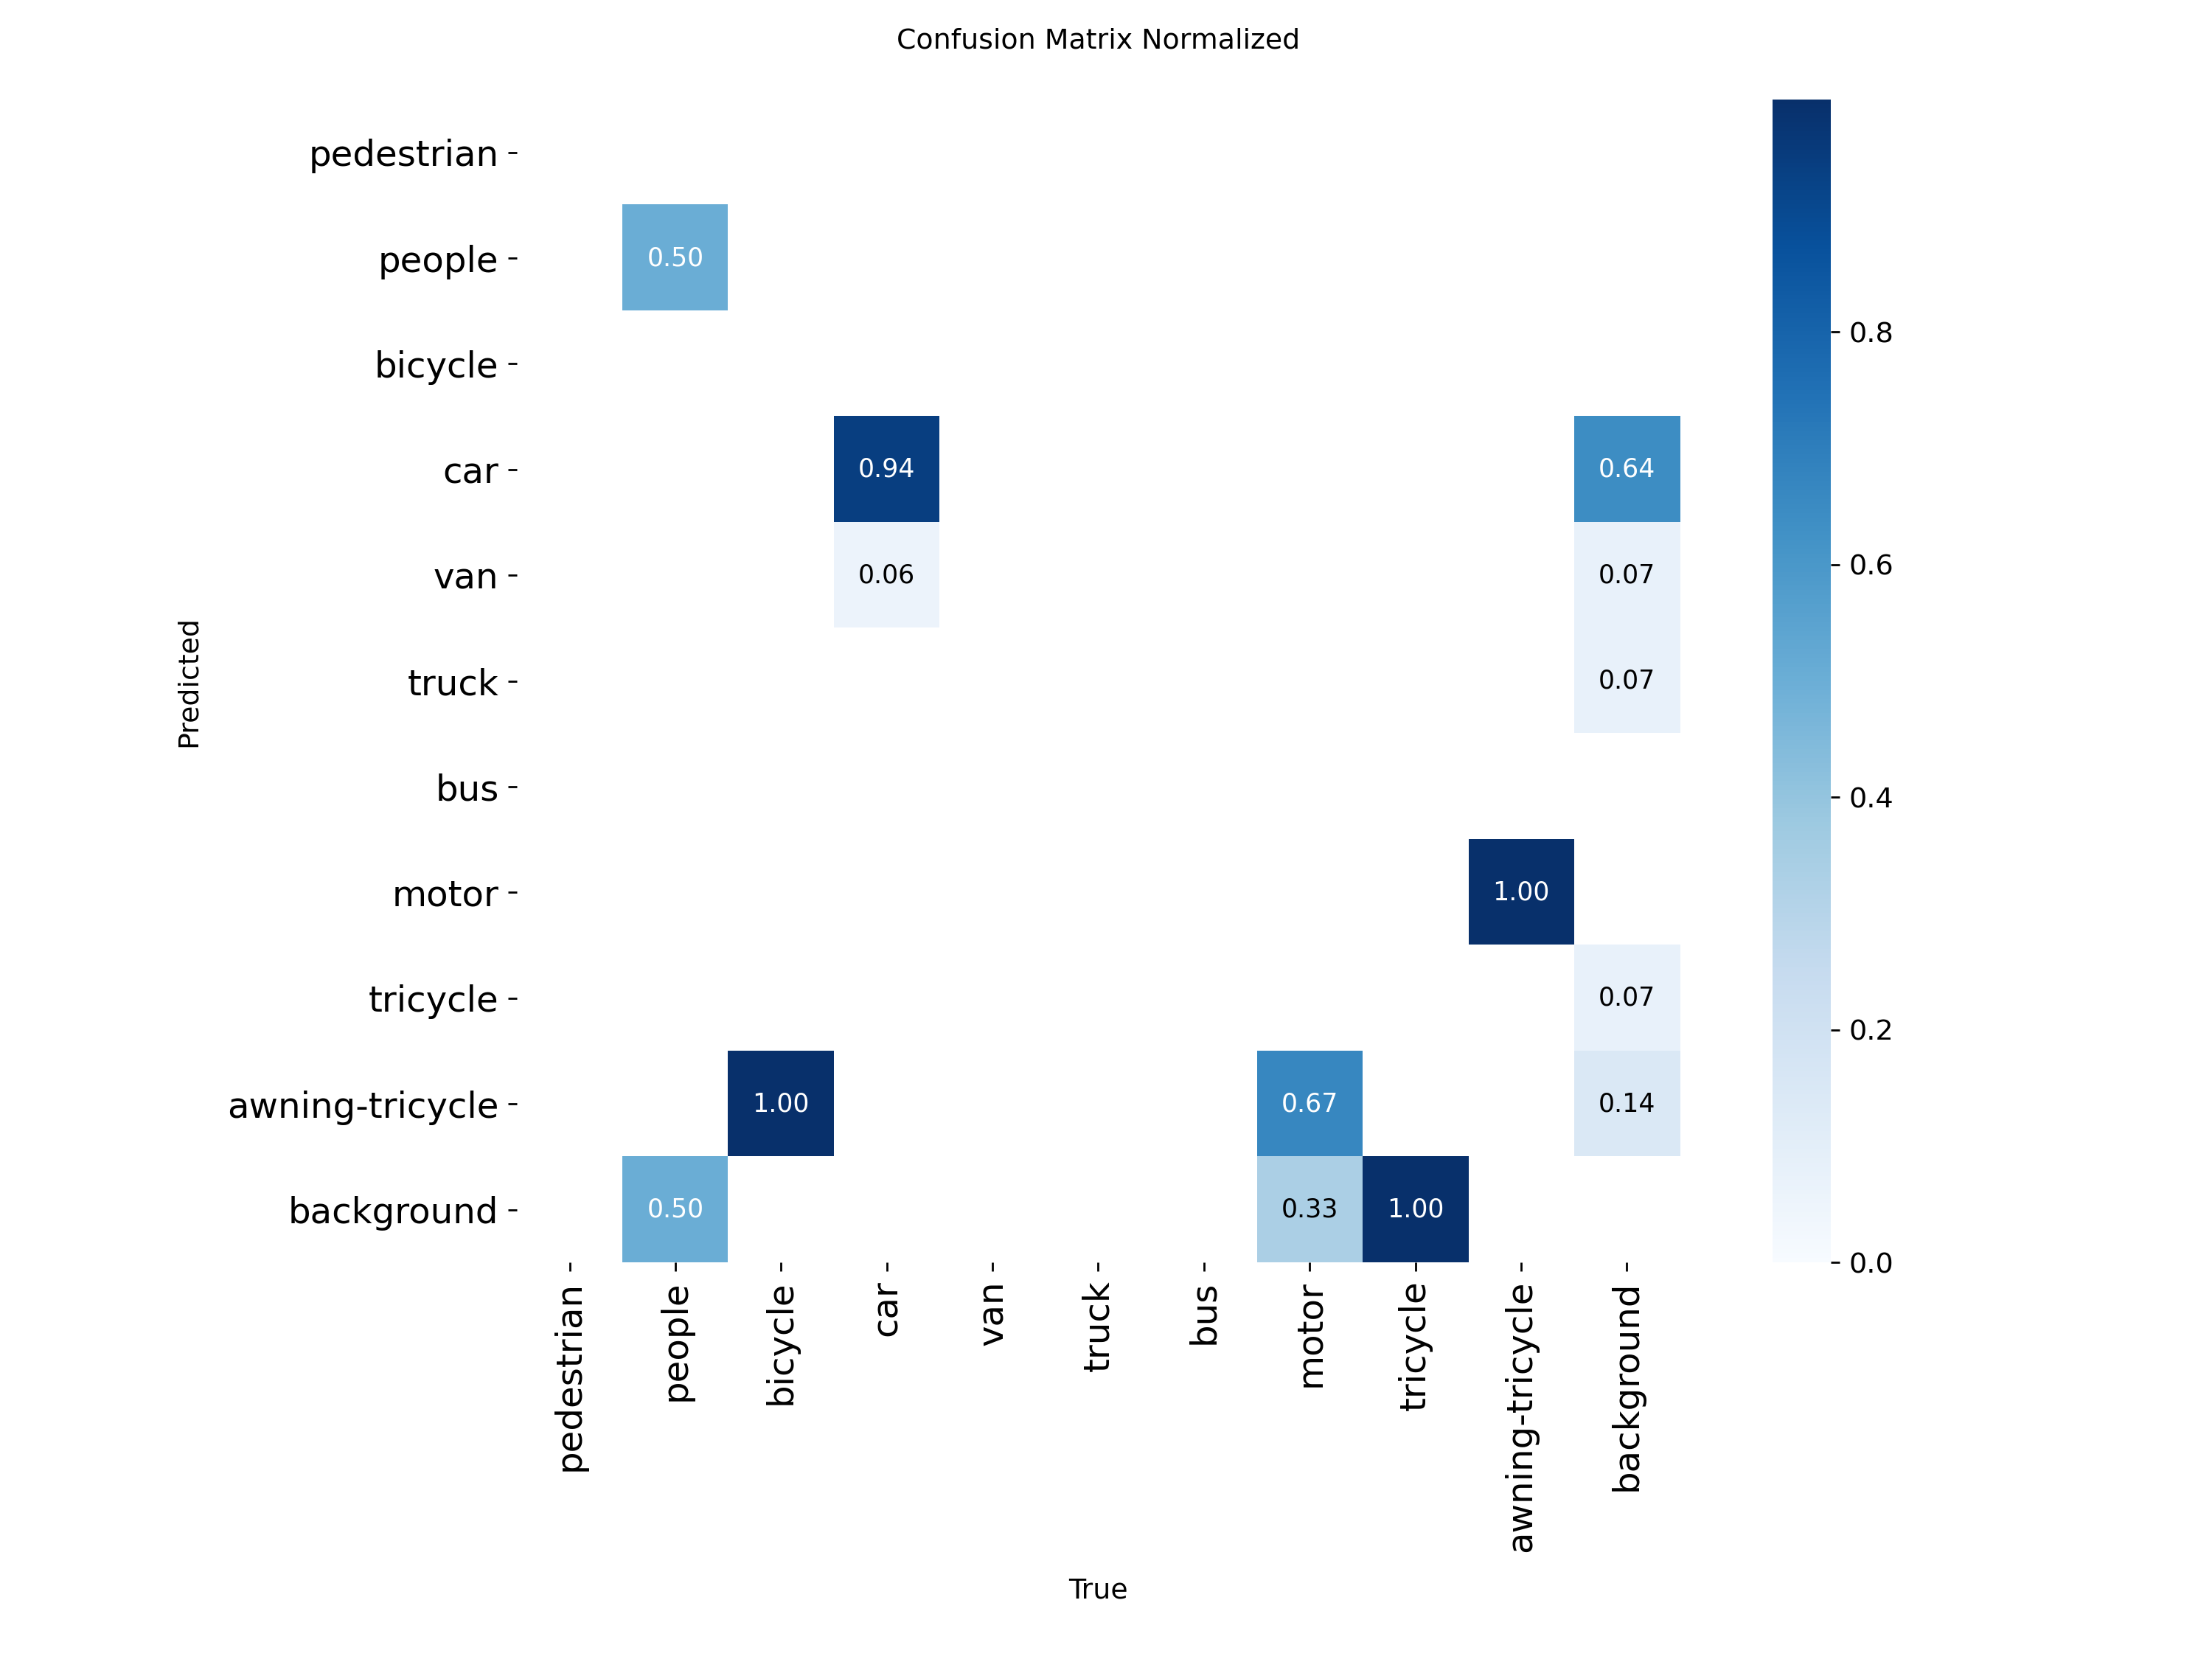


--- Visual Analysis (GT:Green | TP:Blue | FP:Red | FN:Black) ---
TP:20, FP:18, FN:8


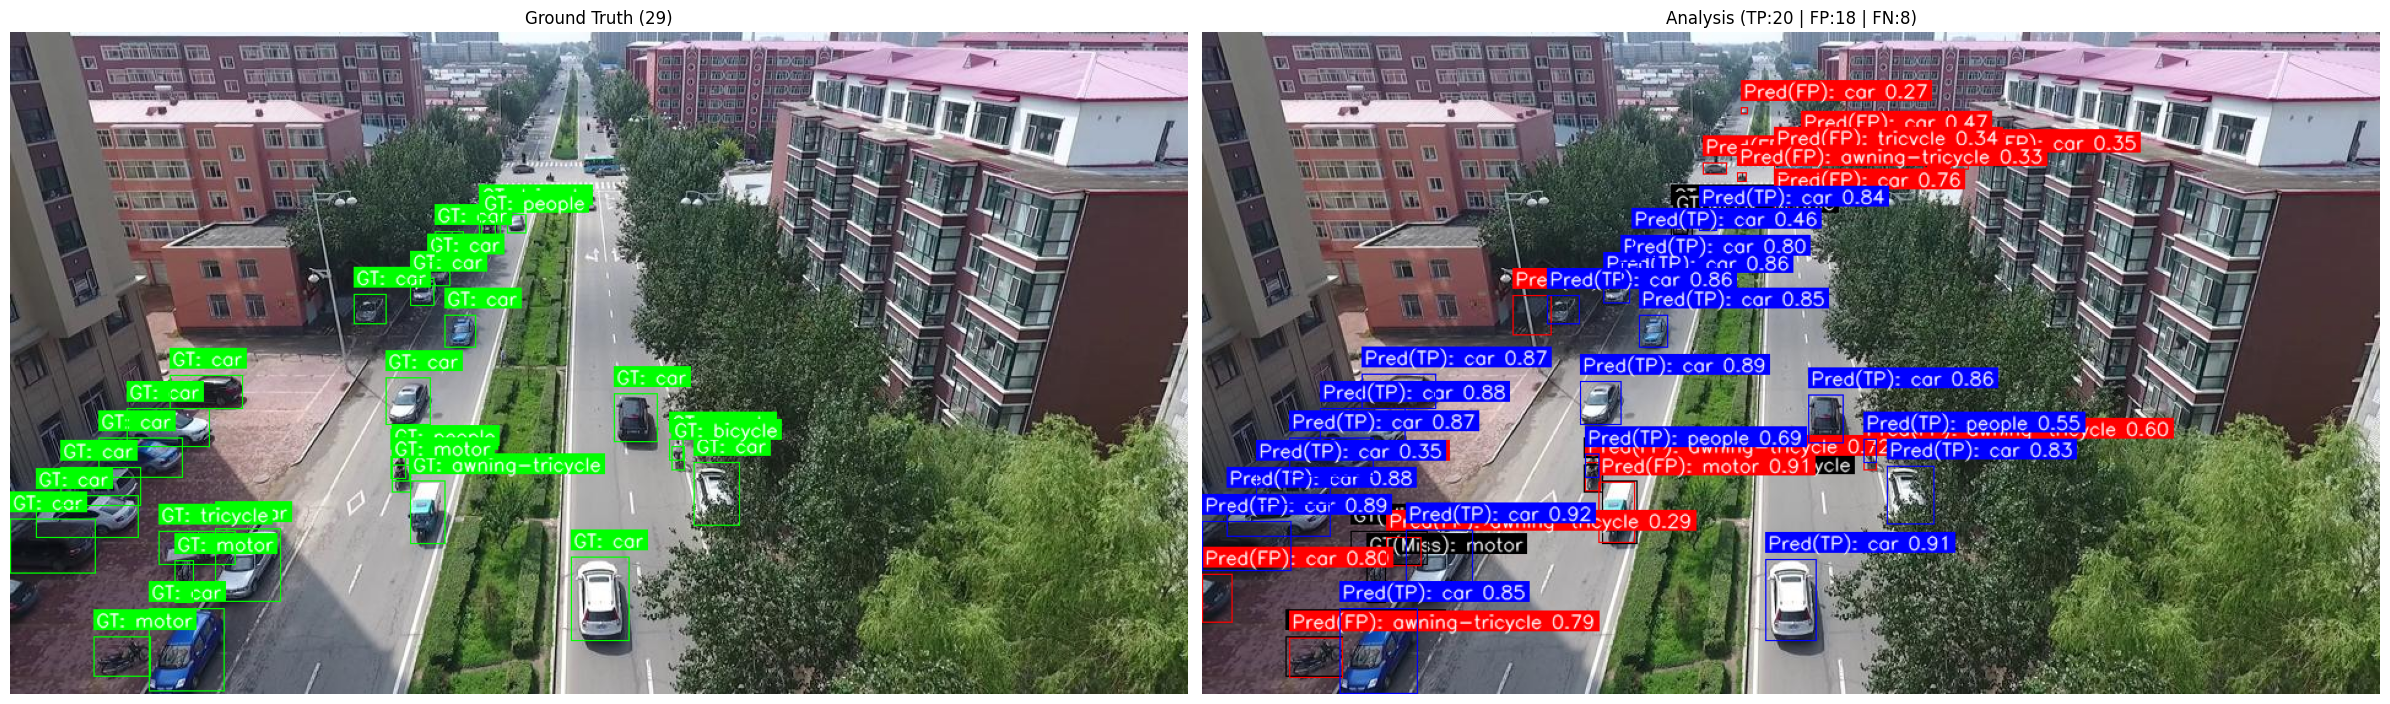

In [131]:
# VisDrone single-image evaluator with TP/FP/FN overlay and confusion matrix (Ultralytics recent API)

import cv2
import random
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO
from ultralytics.utils.metrics import ConfusionMatrix
from IPython.display import Image as IPyImage, display
import torch
from collections import Counter
import numpy as np

# ---------- Config ----------
RUNS_DIR = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training")
RUN_NAME = "train"
BEST_W = RUNS_DIR / RUN_NAME / "weights" / "best.pt"

BASE = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset")
VAL_IMG_DIR = BASE / "VisDrone2019-DET-val" / "images"
VAL_LBL_DIR = BASE / "VisDrone2019-DET-val" / "labels"  # YOLO txt labels (normalized xywh)
EXTS = {".jpg", ".jpeg", ".png"}

IOU_THRESHOLD = 0.5
CONF_THRESHOLD = 0.25

# BGR colors
COLOR_GT = (0, 255, 0)
COLOR_TP = (255, 0, 0)
COLOR_FP = (0, 0, 255)
COLOR_FN = (0, 0, 0)

# VisDrone -> model class remap
# VisDrone order (1-based): 1 pedestrian,2 people,3 bicycle,4 car,5 van,6 truck,7 tricycle,8 awning-tricycle,9 bus,10 motor
# Model order (0-based):   0 pedestrian,1 people,2 bicycle,3 car,4 van,5 truck,6 bus,7 motor,8 tricycle,9 awning-tricycle
VISDRONE_TO_MODEL_MAP = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 9: 6, 10: 7, 7: 8, 8: 9}

# ---------- Utils ----------
def ensure_names_list(names):
    return [names[k] for k in sorted(names)] if isinstance(names, dict) else list(names)

def name_for(cid, names):
    try:
        return names[int(cid)]
    except Exception:
        return f"cls{cid}"

def calculate_iou(box1, box2):
    x1 = max(box1[0], box2[0]); y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2]); y2 = min(box1[3], box2[3])
    inter = max(0, x2 - x1) * max(0, y2 - y1)
    if inter <= 0:
        return 0.0
    a1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    a2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return inter / max(1e-6, a1 + a2 - inter)

def get_gt_boxes(image_path: Path, w: int, h: int):
    """Return list of [x1,y1,x2,y2, model_cls] from YOLO txt (normalized)."""
    label_path = VAL_LBL_DIR / image_path.with_suffix(".txt").name
    boxes = []
    if not label_path.exists():
        return boxes
    with open(label_path, "r") as f:
        for ln in f:
            sp = ln.strip().split()
            if len(sp) != 5:
                continue
            cls, xc, yc, bw, bh = map(float, sp)
            vis_id = int(cls) + 1  # txt is 0-based; VisDrone map expects 1..10
            if vis_id not in VISDRONE_TO_MODEL_MAP:
                continue
            model_cls = VISDRONE_TO_MODEL_MAP[vis_id]
            x1 = int((xc - bw / 2) * w); y1 = int((yc - bh / 2) * h)
            x2 = int((xc + bw / 2) * w); y2 = int((yc + bh / 2) * h)
            x1, y1 = max(0, x1), max(0, y1)
            x2, y2 = min(w - 1, x2), min(h - 1, y2)
            if x2 > x1 and y2 > y1:
                boxes.append([x1, y1, x2, y2, model_cls])
    return boxes

def draw_box(img, box, names, color=(0, 255, 0), prefix=""):
    try:
        if len(box) < 5:
            return
        x1, y1, x2, y2 = map(int, box[:4])
        if x2 <= x1 or y2 <= y1:
            return
        cls = int(box[-1])
        conf = box[4] if len(box) > 5 else None
        label = f"{prefix}{name_for(cls, names)}"
        if conf is not None and isinstance(conf, (int, float, np.floating)):
            label += f" {float(conf):.2f}"
        label = str(label)

        th = max(1, round(min(img.shape[:2]) * 0.002))
        cv2.rectangle(img, (x1, y1), (x2, y2), color, th)

        (tw, th_text), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, max(1, th - 1))
        y_bottom = max(10, y1 - 6)
        y_top = max(0, y_bottom - th_text - 4)
        cv2.rectangle(img, (x1, y_top), (x1 + tw + 4, y_bottom), color, -1)
        cv2.putText(img, label, (x1 + 2, y_bottom - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), max(1, th - 1), cv2.LINE_AA)
    except Exception as e:
        print(f"draw_box error: {e} | data={box}")

# ---------- Load model ----------
if not BEST_W.exists():
    raise FileNotFoundError(f"weights not found: {BEST_W}")

model = YOLO(str(BEST_W))
names_list = ensure_names_list(model.names)
names_dict = {i: n for i, n in enumerate(names_list)}  # for ConfusionMatrix
class_names = names_list  # for labeling/printing
print(f"Loaded model weights from {BEST_W}")

# ---------- Select image ----------
imgs = [p for p in VAL_IMG_DIR.iterdir() if p.suffix.lower() in EXTS]
if not imgs:
    raise RuntimeError(f"No images found in {VAL_IMG_DIR}.")
img_path = random.choice(imgs)
print("===")
print(f"--- Analysis for: {img_path.name} ---")
print("===")

# ---------- Read image and GT ----------
img = cv2.imread(str(img_path))
if img is None:
    raise RuntimeError(f"failed to read {img_path}")
h, w = img.shape[:2]

gt_boxes = get_gt_boxes(img_path, w, h)
gt_counts = Counter([b[4] for b in gt_boxes])

# ---------- Predictions ----------
results = model(img, verbose=False, conf=CONF_THRESHOLD)
pred_boxes, pred_cls, pred_conf, pred_xyxy = [], [], [], []
if results and results[0].boxes is not None:
    b = results[0].boxes
    for i in range(len(b)):
        xyxy = b.xyxy[i].tolist()
        conf = float(b.conf[i].item())
        cls = int(b.cls[i].item())
        pred_boxes.append([*map(float, xyxy), conf, cls])
        pred_cls.append(cls)
        pred_conf.append(conf)
        pred_xyxy.append(xyxy)
pred_counts = Counter(pred_cls)

# ---------- Print class counts ----------
print("--- Ground Truth ---")
print(f"{'ID':<4}|{'Name':<20}|Count")
print("-" * 30)
if not gt_counts:
    print("No GT boxes.")
else:
    for cid in sorted(gt_counts):
        print(f"{cid:<4}|{name_for(cid, class_names):<20}|{gt_counts[cid]}")

print("\n--- Predictions ---")
print(f"{'ID':<4}|{'Name':<20}|Count")
print("-" * 30)
if not pred_counts:
    print("No predictions.")
else:
    for cid in sorted(pred_counts):
        print(f"{cid:<4}|{name_for(cid, class_names):<20}|{pred_counts[cid]}")

# ---------- Confusion Matrix (dict API) ----------
print("\n--- Confusion Matrix (%) ---")
matrix = ConfusionMatrix(names=names_dict, task="detect")  # pass dict, not list

gt_batch = {
    "cls": torch.tensor([b[4] for b in gt_boxes], dtype=torch.long),
    "bboxes": torch.tensor([b[:4] for b in gt_boxes], dtype=torch.float32),
}
pred_batch = {
    "cls": torch.tensor(pred_cls, dtype=torch.long),
    "bboxes": torch.tensor(pred_xyxy, dtype=torch.float32),
    "conf": torch.tensor(pred_conf, dtype=torch.float32),
}

if gt_batch["cls"].numel() and pred_batch["cls"].numel():
    matrix.process_batch(detections=pred_batch, batch=gt_batch,
                         conf=CONF_THRESHOLD, iou_thres=IOU_THRESHOLD)
    matrix.plot(normalize=True, save_dir=Path("."))  # no names kwarg
    cm_img = Path("confusion_matrix_normalized.png")
    if cm_img.exists():
        display(IPyImage(filename=str(cm_img)))
else:
    print("Cannot plot confusion matrix: empty predictions or labels.")

# ---------- Match TP/FP/FN for overlay ----------
matched_gt, matched_pred = set(), set()
for i, gt in enumerate(gt_boxes):
    for j, pr in enumerate(pred_boxes):
        if int(gt[4]) != int(pr[5]):
            continue
        if calculate_iou(gt[:4], pr[:4]) >= IOU_THRESHOLD:
            matched_gt.add(i)
            matched_pred.add(j)

tp_preds = [pred_boxes[j] for j in matched_pred]
fp_preds = [pred_boxes[j] for j in range(len(pred_boxes)) if j not in matched_pred]
fn_gts = [gt_boxes[i] for i in range(len(gt_boxes)) if i not in matched_gt]

# ---------- Draw ----------
img_gt = img.copy()
img_pred = img.copy()

for b in gt_boxes:
    draw_box(img_gt, b, class_names, COLOR_GT, "GT: ")

for b in fn_gts:
    draw_box(img_pred, b, class_names, COLOR_FN, "GT(Miss): ")

for b in fp_preds:
    draw_box(img_pred, b, class_names, COLOR_FP, "Pred(FP): ")

for b in tp_preds:
    draw_box(img_pred, b, class_names, COLOR_TP, "Pred(TP): ")

print(f"\n--- Visual Analysis (GT:Green | TP:Blue | FP:Red | FN:Black) ---")
print(f"TP:{len(tp_preds)}, FP:{len(fp_preds)}, FN:{len(fn_gts)}")

fig, ax = plt.subplots(1, 2, figsize=(24, 12))
ax[0].imshow(cv2.cvtColor(img_gt, cv2.COLOR_BGR2RGB))
ax[0].set_title(f"Ground Truth ({len(gt_boxes)})")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB))
ax[1].set_title(f"Analysis (TP:{len(tp_preds)} | FP:{len(fp_preds)} | FN:{len(fn_gts)})")
ax[1].axis("off")

plt.tight_layout()
plt.show()

### VisDrone test-set inference and results saving

This cell performs inference on the entire test-dev dataset using the trained YOLOv8 model. It saves the detection results for each image in the VisDrone challenge format (.txt files). Optionally, it also saves annotated images with bounding boxes drawn on them to a specified output directory. This is useful for generating submission files and visually inspecting the model's performance on the test set.

In [132]:
# VisDrone test-set inference → per-image result .txt files (challenge format) + optional visuals

import cv2
from pathlib import Path
from collections import Counter
from ultralytics import YOLO
import numpy as np

# -------- Config --------
RUNS_DIR = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training")
RUN_NAME = "train"
BEST_W = RUNS_DIR / RUN_NAME / "weights" / "best.pt"

BASE = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset")
# set your test folder here if different
TEST_IMG_DIR = BASE / "VisDrone2019-DET-test-dev" / "images"   # no labels in test
EXTS = {".jpg", ".jpeg", ".png"}

CONF_THRESHOLD = 0.25
IOU_NMS = 0.7           # model has its own NMS; leave default unless needed
SAVE_VISUALS = True
OUT_DIR = RUNS_DIR / "test_infer"
OUT_TXT = OUT_DIR / "detections_visdrone_txt"   # challenge format
OUT_VIS = OUT_DIR / "images_with_boxes"

# model classes (0..9) → VisDrone category ids (1..10)
# model:   0 ped,1 people,2 bicycle,3 car,4 van,5 truck,6 bus,7 motor,8 tricycle,9 awning-tricycle
# visdrone:1 ped,2 people,3 bicycle,4 car,5 van,6 truck,7 tricycle,8 awning-tricycle,9 bus,10 motor
CLASS_TO_VISDRONE = {0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:9, 7:10, 8:7, 9:8}

# -------- Helpers --------
def ensure_names_list(names):
    return [names[k] for k in sorted(names)] if isinstance(names, dict) else list(names)

def clip_box_xyxy(x1, y1, x2, y2, w, h):
    x1 = int(max(0, min(x1, w - 1)))
    y1 = int(max(0, min(y1, h - 1)))
    x2 = int(max(0, min(x2, w - 1)))
    y2 = int(max(0, min(y2, h - 1)))
    if x2 < x1: x1, x2 = x2, x1
    if y2 < y1: y1, y2 = y2, y1
    return x1, y1, x2, y2

def xyxy_to_xywh_int(x1, y1, x2, y2):
    return int(x1), int(y1), int(max(0, x2 - x1)), int(max(0, y2 - y1))

def draw_box(img, x1, y1, x2, y2, label):
    th = max(1, round(min(img.shape[:2]) * 0.002))
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), th)
    (tw, th_text), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, max(1, th - 1))
    yb = max(10, y1 - 6)
    yt = max(0, yb - th_text - 4)
    cv2.rectangle(img, (x1, yt), (x1 + tw + 4, yb), (0,255,0), -1)
    cv2.putText(img, label, (x1 + 2, yb - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), max(1, th - 1), cv2.LINE_AA)

# -------- Load model --------
if not BEST_W.exists():
    raise FileNotFoundError(f"weights not found: {BEST_W}")
model = YOLO(str(BEST_W))
names = ensure_names_list(model.names)

# -------- Prepare IO --------
OUT_TXT.mkdir(parents=True, exist_ok=True)
if SAVE_VISUALS:
    OUT_VIS.mkdir(parents=True, exist_ok=True)

if not TEST_IMG_DIR.exists():
    raise RuntimeError(f"Test images dir not found: {TEST_IMG_DIR}")
imgs = [p for p in TEST_IMG_DIR.iterdir() if p.suffix.lower() in EXTS]
if not imgs:
    raise RuntimeError(f"No images in {TEST_IMG_DIR}")

# -------- Inference loop --------
totals = Counter()
for idx, img_path in enumerate(sorted(imgs)):
    img = cv2.imread(str(img_path))
    if img is None:
        print(f"skip unreadable: {img_path.name}")
        continue
    h, w = img.shape[:2]

    res = model(img, conf=CONF_THRESHOLD, iou=IOU_NMS, verbose=False)
    boxes = res[0].boxes if res and res[0].boxes is not None else None

    lines = []
    if boxes is not None and len(boxes) > 0:
        for i in range(len(boxes)):
            xyxy = boxes.xyxy[i].tolist()
            conf = float(boxes.conf[i].item())
            cls = int(boxes.cls[i].item())
            if cls not in CLASS_TO_VISDRONE:
                continue
            vd_cls = CLASS_TO_VISDRONE[cls]

            x1, y1, x2, y2 = clip_box_xyxy(int(xyxy[0]), int(xyxy[1]), int(xyxy[2]), int(xyxy[3]), w, h)
            bx, by, bw, bh = xyxy_to_xywh_int(x1, y1, x2, y2)

            # VisDrone submission line: x, y, w, h, score, category, truncation, occlusion
            lines.append(f"{bx},{by},{bw},{bh},{conf:.4f},{vd_cls},0,0")
            totals[cls] += 1

            if SAVE_VISUALS:
                draw_box(img, x1, y1, x2, y2, f"{names[cls]} {conf:.2f}")

    # write per-image txt
    with open(OUT_TXT / f"{img_path.stem}.txt", "w") as f:
        f.write("\n".join(lines))

    if SAVE_VISUALS:
        cv2.imwrite(str(OUT_VIS / img_path.name), img)

# -------- Summary --------
print("Done")
print("Pred counts by model class:")
for cid in sorted(totals):
    print(f"{cid:>2} {names[cid]:<18}: {totals[cid]}")

print(f"Results: {OUT_TXT}")
if SAVE_VISUALS:
    print(f"Visuals: {OUT_VIS}")

Done
Pred counts by model class:
 0 pedestrian        : 9508
 1 people            : 1190
 2 bicycle           : 575
 3 car               : 26348
 4 van               : 3748
 5 truck             : 2039
 6 bus               : 428
 7 motor             : 308
 8 tricycle          : 1907
 9 awning-tricycle   : 3982
Results: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/test_infer/detections_visdrone_txt
Visuals: /content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training/test_infer/images_with_boxes


### Visualize YOLOv8 predictions on VisDrone test images

This cell visualizes the predictions of the trained YOLOv8 model on a random sample of images from the test-dev dataset. It loads the best weights, runs inference on selected images, and uses the `res.plot()` method from Ultralytics to draw bounding boxes and labels on the images. The annotated images are then displayed and saved to a specified directory for review.

In [133]:
# Visualize YOLOv8 predictions on VisDrone test images (show + save)

import random, cv2
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO

# --- config ---
RUNS_DIR = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/runs/yolov8_training")
RUN_NAME = "train"
BEST_W = RUNS_DIR / RUN_NAME / "weights" / "best.pt"

BASE = Path("/content/drive/MyDrive/Projects/SOD YOLOv8/Datasets/VisDrone_Dataset")
TEST_IMG_DIR = BASE / "VisDrone2019-DET-test-dev" / "images"   # change if needed
EXTS = {".jpg", ".jpeg", ".png"}

CONF_THRESHOLD = 0.25
IOU_NMS = 0.7
SAMPLES = 12
COLS = 4

OUT_DIR = RUNS_DIR / "test_infer"
OUT_VIS = OUT_DIR / "images_with_boxes"
OUT_VIS.mkdir(parents=True, exist_ok=True)

# --- load ---
assert BEST_W.exists(), f"weights missing: {BEST_W}"
model = YOLO(str(BEST_W))

imgs = [p for p in TEST_IMG_DIR.iterdir() if p.suffix.lower() in EXTS]
assert imgs, f"no images in {TEST_IMG_DIR}"
random.shuffle(imgs)
sel = imgs[:SAMPLES]

# --- run + show ---
rows = (len(sel) + COLS - 1) // COLS
plt.figure(figsize=(COLS * 5, rows * 5))

for i, p in enumerate(sel, 1):
    im = cv2.imread(str(p))
    if im is None:
        print(f"skip: {p.name}")
        continue
    res = model(im, conf=CONF_THRESHOLD, iou=IOU_NMS, verbose=False)[0]
    im_annot = res.plot()  # BGR
    cv2.imwrite(str(OUT_VIS / p.name), im_annot)

    plt.subplot(rows, COLS, i)
    plt.imshow(cv2.cvtColor(im_annot, cv2.COLOR_BGR2RGB))
    plt.title(p.name)
    plt.axis("off")

plt.tight_layout()
plt.show()

print(f"Saved annotated images to: {OUT_VIS}")

Output hidden; open in https://colab.research.google.com to view.